<a href="https://colab.research.google.com/github/aishwarya-shekar-babu/Road-Accident-Prediction/blob/main/Road_Accident_Prediction_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Prediction of Road Accident Severity with Urban factors and Weather conditions

## Research question


1.   **Research Question 1:** which machine learning approach is optimal in accurately predict the severity of UK road accidents using environmental (e.g. weather), temporal (e.g. time of day, season), spatial (e.g. urban/rural), and which features contribute most to severe outcomes?
2.  **Research Question 2:** How do different weather conditions influence the severity of road traffic accidents, and to predict risk levels associated with specific weather categories? and which location are associated with the highest severity of accidents



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# LOADING DATASET FROM GITHUB

In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive.zip -O /content/drive/MyDrive/RoadAccidentData/archive.zip


In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive-vehicle.zip -O /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip

--2025-05-31 21:16:33--  https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive-vehicle.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aishwarya-shekar-babu/Road-Accident-Prediction/main/archive-vehicle.zip [following]
--2025-05-31 21:16:34--  https://raw.githubusercontent.com/aishwarya-shekar-babu/Road-Accident-Prediction/main/archive-vehicle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60297815 (58M) [application/zip]
Saving to: ‘/content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip’

/content/drive/MyDr 100%[===================>]  57.50M  74.5MB/s

In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive.zip -d /content/drive/MyDrive/RoadAccidentData/

Archive:  /content/drive/MyDrive/RoadAccidentData/archive.zip
   creating: /content/drive/MyDrive/RoadAccidentData/archive/
  inflating: /content/drive/MyDrive/RoadAccidentData/archive/Accident_Information.csv  


In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip -d /content/drive/MyDrive/RoadAccidentData/


Archive:  /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip
   creating: /content/drive/MyDrive/RoadAccidentData/archive-vehicle (1)/
  inflating: /content/drive/MyDrive/RoadAccidentData/archive-vehicle (1)/Vehicle_Information.csv  


# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# READING DATASET

The dataset contains two files vehicle_df and accident_df which contains vehicles andf accident details respectively.Following code is written to merge this dataset and analyse the columns to be considered for further research

In [ ]:
# Path to your file
as_accident_df = pd.read_csv(
    '/content/drive/MyDrive/RoadAccidentData/archive/Accident_Information.csv',
    encoding='ISO-8859-1',
    dtype={'Accident_Index': str},
)

print(as_accident_df.columns)

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')


In [ ]:
as_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [ ]:
as_accident_df.shape

(2047256, 34)

In [ ]:
# 1. Missing counts per column
missing_counts = as_accident_df.isna().sum().sort_values(ascending=False)
print("Missing counts per column:")
print(missing_counts)

# 2. Missing percentages per column
missing_pct = (missing_counts / len(as_accident_df) * 100).sort_values(ascending=False)
print("\nMissing percentages per column:")
print(missing_pct)


Missing counts per column:
Carriageway_Hazards                            2007807
Special_Conditions_at_Site                     1995137
2nd_Road_Class                                  844272
LSOA_of_Accident_Location                       144953
2nd_Road_Number                                  17593
Pedestrian_Crossing-Physical_Facilities           3560
Pedestrian_Crossing-Human_Control                 2920
Did_Police_Officer_Attend_Scene_of_Accident        278
Longitude                                          175
Latitude                                           174
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Time                                               156
InScotland                                          53
Speed_limit                                         37
1st_Road_Number                                      2
1st_Road_Class                                       0
Accident_Index                        

In [ ]:
cols_to_drop = [
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Junction_Control',
    'Junction_Detail',
    'Local_Authority_(Highway)',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Special_Conditions_at_Site',
]

# Drop them in one go:
as_accident_df = as_accident_df.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:", as_accident_df.columns.tolist())
print("New shape:", as_accident_df.shape)


Remaining columns: ['Accident_Index', 'Accident_Severity', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'InScotland']
New shape: (2047256, 22)


In [ ]:
as_cols = [
    'Accident_Index','Accident_Severity','Date','Time','Latitude','Longitude',
    'Local_Authority_(District)','LSOA_of_Accident_Location','Urban_or_Rural_Area',
    'Road_Surface_Conditions','Road_Type','Speed_limit','Weather_Conditions',
    'Light_Conditions','Number_of_Casualties','Number_of_Vehicles',
    'Police_Force','Day_of_Week','InScotland'
]
as_accident_level = as_accident_df[as_cols].copy()
print("After subsetting:", as_accident_level.shape)

After subsetting: (2047256, 19)


In [ ]:
# 1. Unique values in Urban_or_Rural_Area
print("Unique values in Urban_or_Rural_Area:")
print(as_accident_level['Urban_or_Rural_Area'].value_counts(dropna=False))

# 2. Unique values in Weather_Conditions
print("\nUnique values in Weather_Conditions:")
print(as_accident_level['Weather_Conditions'].value_counts(dropna=False))

Unique values in Urban_or_Rural_Area:
Urban_or_Rural_Area
Urban          1322339
Rural           724757
Unallocated        160
Name: count, dtype: int64

Unique values in Weather_Conditions:
Weather_Conditions
Fine no high winds              1640095
Raining no high winds            239281
Other                             44083
Unknown                           42521
Raining + high winds              28343
Fine + high winds                 25816
Snowing no high winds             13387
Fog or mist                       11068
Snowing + high winds               2487
Data missing or out of range        175
Name: count, dtype: int64


In [ ]:
# 1. Identify all object‐ or category‐dtype columns
cat_cols = as_accident_level.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Loop through and print unique values for each
for col in cat_cols:
    unique_vals = as_accident_level[col].unique()
    print(f"Column: {col}")
    print(f"  ({len(unique_vals)} unique values) → {unique_vals}\n")


Column: Accident_Index
  (2047256 unique values) → ['200501BS00001' '200501BS00002' '200501BS00003' ... '2017984121717'
 '2017984122317' '2017984122617']

Column: Accident_Severity
  (3 unique values) → ['Serious' 'Slight' 'Fatal']

Column: Date
  (4748 unique values) → ['2005-01-04' '2005-01-05' '2005-01-06' ... '2017-12-28' '2017-12-29'
 '2017-12-30']

Column: Time
  (1440 unique values) → ['17:42' '17:36' '00:15' ... '05:57' '04:26' '01:57']

Column: Local_Authority_(District)
  (416 unique values) → ['Kensington and Chelsea' 'Westminster' 'Hammersmith and Fulham'
 'City of London' 'Tower Hamlets' 'Southwark' 'Hackney' 'Islington'
 'Camden' 'Lambeth' 'Brent' 'Haringey' 'Barnet' 'Ealing'
 'Richmond upon Thames' 'Waltham Forest' 'Newham'
 'London Airport (Heathrow)' 'Hillingdon' 'Harrow' 'Hounslow' 'Enfield'
 'Redbridge' 'Barking and Dagenham' 'Havering' 'Croydon' 'Wandsworth'
 'Sutton' 'Lewisham' 'Bromley' 'Greenwich' 'Bexley' 'Kingston upon Thames'
 'Merton' 'South Lakeland' 'Barrow

In [ ]:
as_accident_level.shape

(2047256, 19)

In [ ]:
# 2.3 Fill missing Time with "00:00"
as_accident_level['Time'] = as_accident_level['Time'].fillna('00:00')

# 1) First, coerce Latitude/Longitude to numeric (so any non-numeric becomes NaN)
as_accident_level['Latitude'] = pd.to_numeric(
    as_accident_level['Latitude'], errors='coerce'
)
as_accident_level['Longitude'] = pd.to_numeric(
    as_accident_level['Longitude'], errors='coerce'
)

# 2) Now drop any row where either is NaN
before = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(
    subset=['Latitude','Longitude'], how='any'
)

In [ ]:
# 2.5 Drop OS grid columns entirely
as_accident_level = as_accident_level.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'], errors='ignore')

# 2.6 Fill missing Speed_limit with -1
as_accident_level['Speed_limit'] = as_accident_level['Speed_limit'].fillna(-1)

# 2.10 Fill missing Number_of_Casualties / Number_of_Vehicles with 0
as_accident_level['Number_of_Casualties'] = \
    as_accident_level['Number_of_Casualties'].fillna(0).astype(int)
as_accident_level['Number_of_Vehicles']   = \
    as_accident_level['Number_of_Vehicles'].fillna(0).astype(int)

In [ ]:
# 2.7 Fill missing InScotland with "Unknown"
as_accident_level['InScotland'] = as_accident_level['InScotland'].fillna('Unknown').astype(str).str.strip()

# 2.8 Fill missing LSOA_of_Accident_Location (~7%) with "Unknown"
as_accident_level['LSOA_of_Accident_Location'] = (
    as_accident_level['LSOA_of_Accident_Location']
    .fillna('Unknown')
    .astype(str)
    .str.strip()
)

In [ ]:
# 2.9 Fill all remaining categorical columns with "Unknown" if missing
for col in [
    'Local_Authority_(District)',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week',
    'Police_Force'
]:
    as_accident_level[col] = as_accident_level[col].fillna('Unknown').astype(str).str.strip()


# 2.11 PARSE DATE into datetime, letting pandas infer format (no explicit format string):
print("Before date parsing, rows:", as_accident_level.shape[0])
as_accident_level['Date_dt'] = pd.to_datetime(as_accident_level['Date'], errors='coerce')
# Drop any rows where date parse failed—should be very few if any
before_drop_date = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(subset=['Date_dt'])
print("Dropped", before_drop_date - as_accident_level.shape[0], "rows where Date parse failed")
print("After date parsing, rows:", as_accident_level.shape[0])





Before date parsing, rows: 2047081
Dropped 0 rows where Date parse failed
After date parsing, rows: 2047081


In [ ]:

# === 3) FEATURE ENGINEERING / CLEANING CATEGORICALS ===

# 3.1 TEMPORAL FEATURES
as_accident_level['Hour'] = pd.to_datetime(
    as_accident_level['Date'] + ' ' + as_accident_level['Time'],
    format='%Y-%m-%d %H:%M',  # Time string already "HH:MM", Date "YYYY-MM-DD"
    errors='coerce'
).dt.hour

# If any Hour parse failed (unlikely), fill with median
as_accident_level['Hour'] = as_accident_level['Hour'].fillna(as_accident_level['Hour'].median()).astype(int)

# Weekday and Month from Date_dt
as_accident_level['Weekday_Num'] = as_accident_level['Date_dt'].dt.dayofweek
as_accident_level['Month']       = as_accident_level['Date_dt'].dt.month

# 5.8 DAY OF WEEK: Day_of_Week_Label from Date_dt (ignore original Day_of_Week)
as_accident_level['Day_of_Week_Label'] = as_accident_level['Date_dt'].dt.day_name()

# Assuming 'Date_dt' is your datetime column
as_accident_level['Year'] = as_accident_level['Date_dt'].dt.year

# Season from Month
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
as_accident_level['Season'] = as_accident_level['Month'].apply(month_to_season)

# Time_of_Day from Hour
def time_of_day(h):
    if pd.isna(h):
        return 'Unknown'
    if h < 6:
        return 'Late_Night'
    elif h < 9:
        return 'Morning_Peak'
    elif h < 16:
        return 'Daytime'
    elif h < 19:
        return 'Evening_Peak'
    else:
        return 'Night'
as_accident_level['Time_of_Day'] = as_accident_level['Hour'].apply(time_of_day)



In [ ]:
as_accident_level.head()

,Accident_Index,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),LSOA_of_Accident_Location,Urban_or_Rural_Area,Road_Surface_Conditions,...,Day_of_Week,InScotland,Date_dt,Hour,Weekday_Num,Month,Day_of_Week_Label,Year,Season,Time_of_Day
0,200501BS00001,Serious,2005-01-04,17:42,51.489096,-0.191170,Kensington and Chelsea,E01002849,Urban,Wet or damp,...,Tuesday,No,2005-01-04,17,1,1,Tuesday,2005,Winter,Evening_Peak
1,200501BS00002,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,E01002909,Urban,Dry,...,Wednesday,No,2005-01-05,17,2,1,Wednesday,2005,Winter,Evening_Peak
2,200501BS00003,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,E01002857,Urban,Dry,...,Thursday,No,2005-01-06,0,3,1,Thursday,2005,Winter,Late_Night
3,200501BS00004,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,E01002840,Urban,Dry,...,Friday,No,2005-01-07,10,4,1,Friday,2005,Winter,Daytime
4,200501BS00005,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,E01002863,Urban,Wet or damp,...,Monday,No,2005-01-10,21,0,1,Monday,2005,Winter,Night


In [ ]:
# 5.2 SPATIAL: URBAN_OR_RURAL_AREA → Urban_Rural_Label
#     Unique raw values: ['Urban', 'Rural', 'Unallocated']
as_accident_level['Urban_or_Rural_Area'] = as_accident_level['Urban_or_Rural_Area'].astype(str).str.strip()
def map_urban_rural(x):
    if x == 'Urban':
        return 'Urban'
    elif x == 'Rural':
        return 'Rural'
    else:  # 'Unallocated' or anything else
        return 'Unknown'
as_accident_level['Urban_Rural_Label'] = as_accident_level['Urban_or_Rural_Area'].apply(map_urban_rural)

In [ ]:
as_accident_level.head()

,Accident_Index,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),LSOA_of_Accident_Location,Urban_or_Rural_Area,Road_Surface_Conditions,...,InScotland,Date_dt,Hour,Weekday_Num,Month,Day_of_Week_Label,Year,Season,Time_of_Day,Urban_Rural_Label
0,200501BS00001,Serious,2005-01-04,17:42,51.489096,-0.191170,Kensington and Chelsea,E01002849,Urban,Wet or damp,...,No,2005-01-04,17,1,1,Tuesday,2005,Winter,Evening_Peak,Urban
1,200501BS00002,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,E01002909,Urban,Dry,...,No,2005-01-05,17,2,1,Wednesday,2005,Winter,Evening_Peak,Urban
2,200501BS00003,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,E01002857,Urban,Dry,...,No,2005-01-06,0,3,1,Thursday,2005,Winter,Late_Night,Urban
3,200501BS00004,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,E01002840,Urban,Dry,...,No,2005-01-07,10,4,1,Friday,2005,Winter,Daytime,Urban
4,200501BS00005,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,E01002863,Urban,Wet or damp,...,No,2005-01-10,21,0,1,Monday,2005,Winter,Night,Urban


In [ ]:
# 1) Define an exact mapping from each raw string → final label
weather_map = {
    'Fine no high winds':       'Fine',
    'Fine + high winds':        'Fine+high winds',
    'Raining no high winds':    'Raining',
    'Raining + high winds':     'Raining',
    'Snowing no high winds':    'Snowing_Ice',
    'Snowing + high winds':     'Snowing_Ice',
    'Fog or mist':              'Fog',
    'Other':                    'Other_Adverse',
    'Unknown':                  'Unknown',
    'Data missing or out of range': 'Unknown'
}

# 2) Ensure there are no trailing spaces—strip just in case
as_accident_level['Weather_Conditions'] = as_accident_level['Weather_Conditions'].astype(str).str.strip()

# 3) Apply the mapping with .map(...). Any unexpected string becomes NaN,
#    so we then fillna('Unknown') to catch any anomalies.
as_accident_level['Weather_Label'] = (
    as_accident_level['Weather_Conditions']
    .map(weather_map)         # map known strings → label
    .fillna('Unknown')        # if somehow a value is not in the dict
)

# 4) Verify that the mapping worked correctly
print("Unique raw Weather_Conditions values:")
print(as_accident_level['Weather_Conditions'].unique(), "\n")

print("Unique mapped Weather_Label values:")
print(as_accident_level['Weather_Label'].unique())

# Optionally, show counts to ensure balance
print("\nValue counts for Weather_Label:")
print(as_accident_level['Weather_Label'].value_counts())


Unique raw Weather_Conditions values:
['Raining no high winds' 'Fine no high winds' 'Unknown'
 'Snowing no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' 'Fog or mist' 'Snowing + high winds'
 'Data missing or out of range'] 

Unique mapped Weather_Label values:
['Raining' 'Fine' 'Unknown' 'Snowing_Ice' 'Other_Adverse'
 'Fine+high winds' 'Fog']

Value counts for Weather_Label:
Weather_Label
Fine               1639967
Raining             267596
Other_Adverse        44079
Unknown              42687
Fine+high winds      25815
Snowing_Ice          15871
Fog                  11066
Name: count, dtype: int64


In [ ]:
def map_road_surface(x):
    if x == 'Dry':
        return 'Dry'
    elif x == 'Wet or damp':
        return 'Wet_or_Damp'
    elif x in ['Snow', 'Frost or ice']:
        return 'Snow_Ice'
    elif x == 'Flood over 3cm. deep':
        return 'Flood'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Road_Surface_Label'] = as_accident_level['Road_Surface_Conditions'].apply(map_road_surface)

print("Unique Road_Surface_Label values:", as_accident_level['Road_Surface_Label'].unique())



Unique Road_Surface_Label values: ['Wet_or_Damp' 'Dry' 'Snow_Ice' 'Flood' 'Unknown']


In [ ]:
def map_road_type(x):
    if x == 'Dual carriageway':
        return 'Dual_Carriageway'
    elif x == 'Single carriageway':
        return 'Single_Carriageway'
    elif x == 'One way street':
        return 'One_Way_Street'
    elif x == 'Roundabout':
        return 'Roundabout'
    elif x == 'Slip road':
        return 'Slip_Road'
    else:  # 'Unknown' or 'Data missing or out of range'
        return 'Unknown'

as_accident_level['Road_Type_Label'] = as_accident_level['Road_Type'].apply(map_road_type)

print("Unique Road_Type_Label values:", as_accident_level['Road_Type_Label'].unique())


Unique Road_Type_Label values: ['Single_Carriageway' 'Dual_Carriageway' 'One_Way_Street' 'Roundabout'
 'Slip_Road' 'Unknown']


In [ ]:
as_accident_level['Light_Conditions'] = as_accident_level['Light_Conditions'].astype(str).str.strip()

def map_light(x):
    if x == 'Daylight':
        return 'Daylight'
    elif x == 'Darkness - lights lit':
        return 'Darkness_Lights_On'
    elif x == 'Darkness - lights unlit':
        return 'Darkness_Lights_Off'
    elif x in ['Darkness - lighting unknown', 'Darkness - no lighting']:
        return 'Dark_No_Lighting'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Light_Label'] = as_accident_level['Light_Conditions'].apply(map_light)

print("Unique Light_Label values:", as_accident_level['Light_Label'].unique())

Unique Light_Label values: ['Daylight' 'Darkness_Lights_On' 'Dark_No_Lighting' 'Darkness_Lights_Off'
 'Unknown']


In [ ]:
def speed_bin(x):
    try:
        sl = float(x)
    except:
        return 'Unknown'
    if sl <= 30:
        return 'Low_30'
    elif sl <= 50:
        return 'Mid_50'
    elif sl <= 70:
        return 'High_70'
    else:
        return 'Very_High'

as_accident_level['Speed_Bin'] = as_accident_level['Speed_limit'].apply(speed_bin)

print("Unique Speed_Bin values:", as_accident_level['Speed_Bin'].unique())

Unique Speed_Bin values: ['Low_30' 'Mid_50' 'High_70']


In [ ]:
# Now that we have mapped/engineered every column, drop the raw ones:
cols_to_drop = [
    'Date',
    'Time',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Speed_limit',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week'
]

as_accident_level = as_accident_level.drop(columns=[c for c in cols_to_drop if c in as_accident_level.columns],
                                     errors='ignore')

print("\nFinal columns in accident_level:")
print(as_accident_level.columns.tolist())

print("\nFinal shape:", as_accident_level.shape)


Final columns in accident_level:
['Accident_Index', 'Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Date_dt', 'Hour', 'Weekday_Num', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']

Final shape: (2047081, 24)


In [ ]:
# Check for any remaining missing values in the columns we care about:
to_check = [
    'Local_Authority_(District)',
    'LSOA_of_Accident_Location',
    'Police_Force',
    'InScotland',
    'Hour',
    'Weekday_Num',
    'Month',
    'Season',
    'Time_of_Day',
    'Urban_Rural_Label',
    'Weather_Label',
    'Light_Label',
    'Road_Surface_Label',
    'Road_Type_Label',
    'Speed_Bin',
    'Day_of_Week_Label',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Latitude',
    'Longitude'
]

print("\nMissing counts in final features:")
print(as_accident_level[to_check].isna().sum())

# Show the first few rows of the cleaned DataFrame
print("\nSample of final accident_level:")
print(as_accident_level.head())


Missing counts in final features:
Local_Authority_(District)    0
LSOA_of_Accident_Location     0
Police_Force                  0
InScotland                    0
Hour                          0
Weekday_Num                   0
Month                         0
Season                        0
Time_of_Day                   0
Urban_Rural_Label             0
Weather_Label                 0
Light_Label                   0
Road_Surface_Label            0
Road_Type_Label               0
Speed_Bin                     0
Day_of_Week_Label             0
Number_of_Vehicles            0
Number_of_Casualties          0
Latitude                      0
Longitude                     0
dtype: int64

Sample of final accident_level:
  Accident_Index Accident_Severity   Latitude  Longitude  \
0  200501BS00001           Serious  51.489096  -0.191170   
1  200501BS00002            Slight  51.520075  -0.211708   
2  200501BS00003            Slight  51.525301  -0.206458   
3  200501BS00004            Slight  51.

In [ ]:
# Assuming your cleaned DataFrame is `as_accident_level`
print(as_accident_level.columns.tolist())


['Accident_Index', 'Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Date_dt', 'Hour', 'Weekday_Num', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


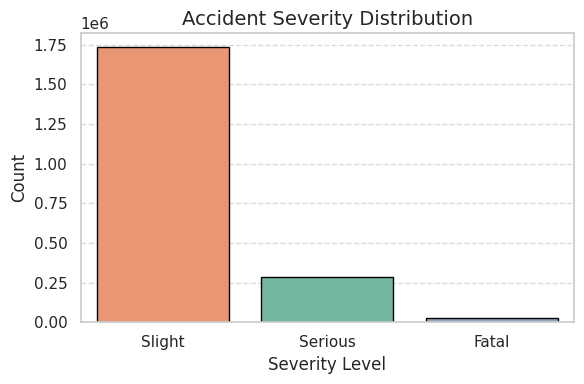

In [ ]:
# Ensure 'Accident_Severity' column exists and has the correct categories
order = ['Slight', 'Serious', 'Fatal']

plt.figure(figsize=(6, 4))
sns.countplot(
    data=as_accident_level,
    x='Accident_Severity',
    hue='Accident_Severity',          # Add this to avoid the future warning
    order=order,
    palette='Set2',                   # Choose a visually appealing palette
    edgecolor='black',
    legend=False                      # Remove redundant legend
)

plt.title('Accident Severity Distribution', fontsize=14)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


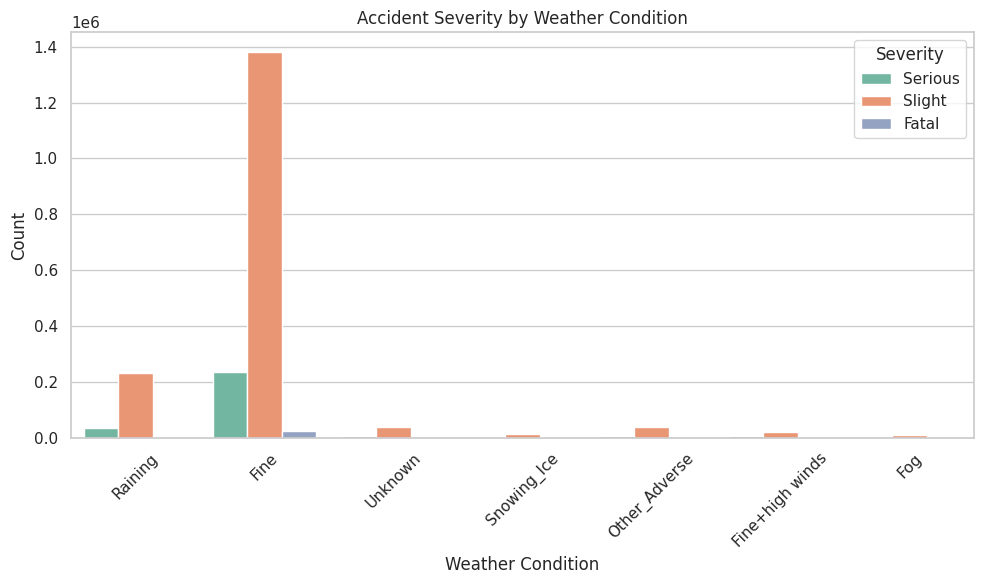

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=as_accident_level, x='Weather_Label', hue='Accident_Severity', palette='Set2')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


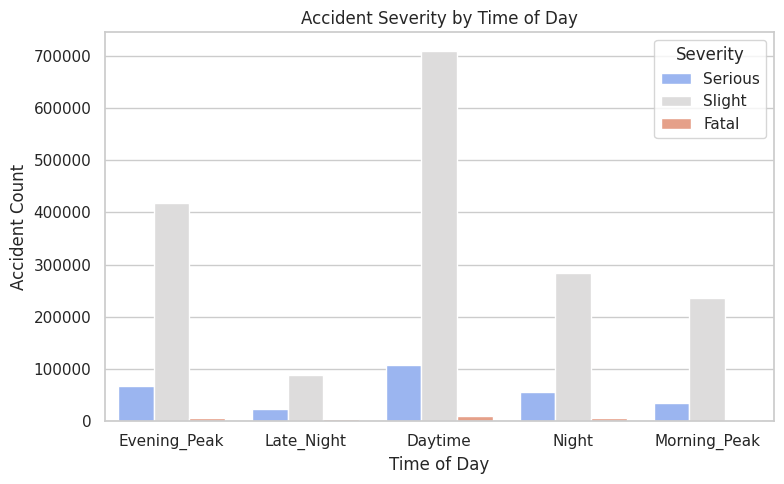

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=as_accident_level, x='Time_of_Day', hue='Accident_Severity', palette='coolwarm')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


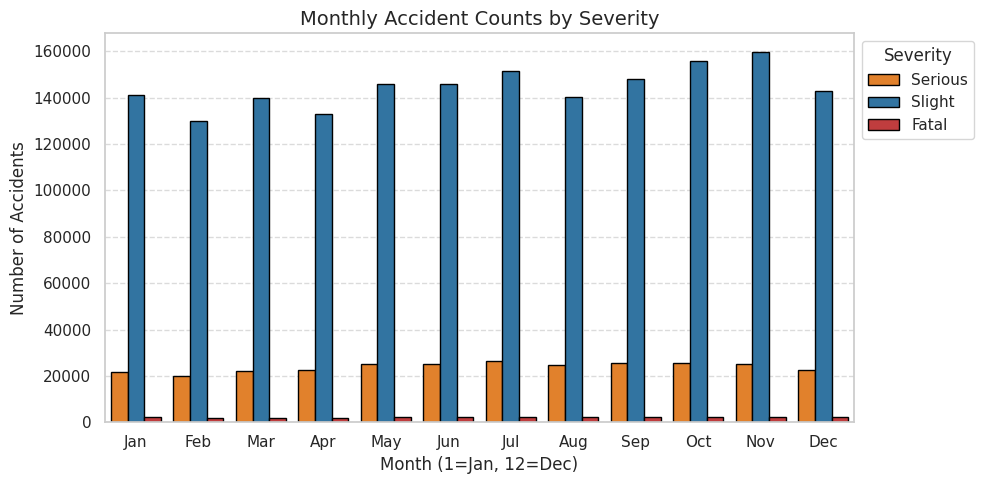

In [ ]:

plt.figure(figsize=(10, 5))

# Use a well-contrasted palette manually
custom_palette = {'Slight': '#1f77b4', 'Serious': '#ff7f0e', 'Fatal': '#d62728'}

sns.countplot(
    data=as_accident_level,
    x='Month',
    hue='Accident_Severity',
    palette=custom_palette,
    edgecolor='black'
)

plt.title('Monthly Accident Counts by Severity', fontsize=14)
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend outside the plot area to the top right
plt.legend(title='Severity', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



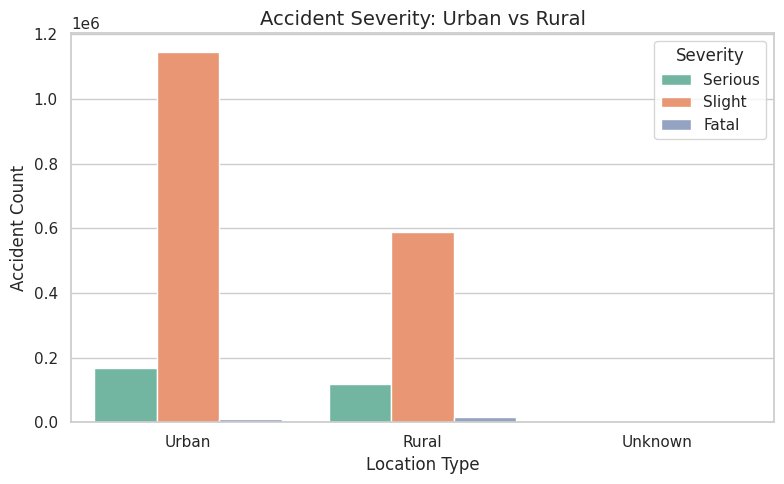

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=as_accident_level,
    x='Urban_Rural_Label',
    hue='Accident_Severity',
    palette='Set2'
)
plt.title('Accident Severity: Urban vs Rural', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()
